In [1]:
from keras import models
from keras import layers,datasets

Using TensorFlow backend.


In [2]:
from keras import losses

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from keras import callbacks

In [5]:
import keras

In [6]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.image import imread

In [7]:
from PIL import Image
from numpy import asarray

In [8]:
import numpy as np
import pandas as pd

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [10]:
from sklearn import decomposition

In [11]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        './train_birds0',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
val_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
val_generator = val_datagen.flow_from_directory(
        './val_birds0',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 15 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [12]:
len(train_generator[0])

2

In [13]:
class Conv_build():
    def __init__(self, fltr,k):
        self.fltr=fltr
        self.k=k
        self.model=self.build_model()
#         self.fit=self.fit(self.model)
    
    def build_model(self):
        model = models.Sequential()
    
        model.add(layers.Conv2D(self.fltr*1, (self.k, self.k), activation='relu', input_shape=(224,224,3)))
        model.add(layers.Conv2D(self.fltr*1, (self.k, self.k), activation='relu'))
        return model   

In [14]:
class add_lyrs(Conv_build):
    def __init__(self, fltr,k,model):
        super().__init__(fltr,k)
        self.model=model
        
    def add_lyr(self,fac):
        self.fac=fac
        self.model.add(layers.Conv2D(self.fltr*self.fac, (self.k, self.k), activation='relu'))
        return self.model   
    
    def add_pool(self):
        self.model.add(layers.MaxPooling2D((2, 2)))
        return self.model
    
    def add_cnn(self):
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.fltr*2,activation='relu'))        
        return self.model
    
    def add_drp(self):
        self.model.add(layers.Dropout(0.35))
        self.model.add(layers.Dense(self.fltr*4,activation='relu'))  
        return self.model      

        

In [15]:
def model_builder(fltr,k,fac,lyrs,pools,drop):
    mdl=Conv_build(fltr,k).build_model()
    for i in range(lyrs[0]):
        add_lyrs(fltr,k,mdl).add_lyr(fac[0])
    if pools[0]!=0:
        add_lyrs(fltr,k,mdl).add_pool()
    for i in range(lyrs[1]):
        add_lyrs(fltr,k,mdl).add_lyr(fac[1])
    if pools[1]!=0:
        add_lyrs(fltr,k,mdl).add_pool()
    for i in range(lyrs[2]):
        add_lyrs(fltr,k,mdl).add_lyr(fac[2])
    if pools[2]!=0:
        add_lyrs(fltr,k,mdl).add_pool()
    for i in range(lyrs[3]):
        add_lyrs(fltr,k,mdl).add_lyr(fac[3])
    if pools[3]!=0:
        add_lyrs(fltr,k,mdl).add_pool()
    for i in range(lyrs[4]):
        add_lyrs(fltr,k,mdl).add_lyr(fac[4])
    if pools[4]!=0:
            add_lyrs(fltr,k,mdl).add_pool()
    for i in range(lyrs[5]):
            add_lyrs(fltr,k,mdl).add_lyr(fac[5])        
    
    add_lyrs(fltr,k,mdl).add_cnn()
    if drop:
        add_lyrs(fltr,k,mdl).add_drp()
    return mdl      

In [16]:
fltr=32
k=3
fac=[1,2,2,4,4,0]
lyrs=[1,3,2,1,1,0]
pools=[1,1,1,1,0]
drop=True

In [17]:
mdl_drop=model_builder(fltr,k,fac,lyrs,pools, drop)
mdl_drop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 218, 218, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 107, 107, 64)      18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 105, 105, 64)      36928     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 103, 103, 64)     

In [18]:
fltr2=32
k2=3
fac2=[1,1,2,2,4,4]
lyrs2=[0,1,2,1,1,1]
pools2=[1,1,1,1,1]
drop2=None

In [19]:
mdl_base=model_builder(fltr=fltr2,k=k2,fac=fac2,lyrs=lyrs2,pools=pools2, drop=drop2)
mdl_base.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 108, 108, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 50, 50, 64)      

In [37]:
# mdl_base.add(layers.Dense(len(classes),activation='softmax'))    
# mdl_base.compile(optimizer='adam',
#               loss=losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# mdl_base

In [38]:
# mdl_base.fit(train_imgs,train_lbls,epochs=7,validation_data=(val_imgs, val_lbls))

In [16]:
fltr3=32
k3=3
fac3=[1,2,4,8,0,0]
lyrs3=[1,3,3,3,0,0]
pools3=[1,1,1,1,0]
drop3=None

In [17]:
mdl_12lyrs=model_builder(fltr3,k3,fac3,lyrs3,pools3, drop3)
mdl_12lyrs.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 218, 218, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 107, 107, 64)      18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 105, 105, 64)      36928     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 103, 103, 64)     

In [41]:
mdl_dict={'Base':mdl_base,'Drop':mdl_drop,'12 Layers':mdl_12lyrs}

In [45]:
def model_sel(mdl_dict):
    
    val_accs={}
    
    for mod,conv in mdl_dict.items():  
        print(mod)
        conv.add(layers.Dense(len(classes),activation='softmax'))  
        conv.compile(optimizer=keras.optimizers.Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
        model_f=conv.fit(train_generator,epochs=10,validation_data=val_generator)
        
        accs=model_f.history['accuracy']
        val_accs[mod]=accs
    return val_accs

In [46]:
val_accs=model_sel(mdl_dict)
val_accs

Base
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.0916 - accuracy: 0.2667 - val_loss: 1.1698 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 1s 688ms/step - loss: 1.1684 - accuracy: 0.3333 - val_loss: 0.9940 - val_accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 1s 678ms/step - loss: 1.0943 - accuracy: 0.3333 - val_loss: 1.0651 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 1s 665ms/step - loss: 1.0830 - accuracy: 0.4000 - val_loss: 1.0734 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 665ms/step - loss: 1.0876 - accuracy: 0.4000 - val_loss: 1.0781 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 667ms/step - loss: 1.0794 - accuracy: 0.4000 - val_loss: 1.0549 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 1s 674ms/step - loss: 1.0686 - accuracy: 0.5333 - val_loss: 1.0910 - val_accuracy: 0.3333
Epoch 8/10
1/1 [==

{'Base': [0.26666668,
  0.33333334,
  0.33333334,
  0.4,
  0.4,
  0.4,
  0.53333336,
  0.4,
  0.4,
  0.33333334],
 'Drop': [0.46666667,
  0.26666668,
  0.2,
  0.46666667,
  0.4,
  0.46666667,
  0.6,
  0.33333334,
  0.53333336,
  0.53333336],
 '12 Layers': [0.4,
  0.6,
  0.6,
  0.8,
  0.93333334,
  1.0,
  0.8666667,
  0.93333334,
  1.0,
  1.0]}

In [20]:
def Twlv_lyrs(fltr,k):
   
    model = models.Sequential()
    
    model.add(layers.Conv2D(fltr*1, (k,k), activation='relu', input_shape=(224,224,3)))
    
    model.add(layers.Conv2D(fltr*1, (k,k), activation='relu'))   
    model.add(layers.Conv2D(fltr*1, (k,k), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(fltr*2, (k,k), activation='relu'))
    model.add(layers.Conv2D(fltr*2, (k,k), activation='relu'))
    model.add(layers.Conv2D(fltr*2, (k,k), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(fltr*4, (k,k), activation='relu'))
    model.add(layers.Conv2D(fltr*4, (k,k), activation='relu'))
    model.add(layers.Conv2D(fltr*4, (k,k), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(fltr*8, (k,k), activation='relu'))
    model.add(layers.Conv2D(fltr*8, (k,k), activation='relu'))
    model.add(layers.Conv2D(fltr*8, (k,k), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
       
    model.add(layers.Flatten())
    model.add(layers.Dense(fltr*2,activation='relu'))  
    model.add(layers.Dense(10,activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
#      model_f=conv.fit(train_generator,epochs=10,validation_data=val_generator)       
  
    return model

In [21]:
twelv=Twlv_lyrs(32,3)
twelv

In [22]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
train_generator2 = train_datagen.flow_from_directory(
        './train_birds20',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
val_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
val_generator2 = val_datagen.flow_from_directory(
        './val_birds20',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 120 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [23]:
model_20f=twelv.fit(train_generator2,epochs=30,validation_data=val_generator2)       

Epoch 1/30
4/4 [==============================] - 47s 12s/step - loss: 2.5642 - accuracy: 0.1083 - val_loss: 2.2899 - val_accuracy: 0.0667
Epoch 2/30
4/4 [==============================] - 43s 11s/step - loss: 2.3085 - accuracy: 0.1083 - val_loss: 2.2642 - val_accuracy: 0.1000
Epoch 3/30
4/4 [==============================] - 44s 11s/step - loss: 2.2532 - accuracy: 0.2000 - val_loss: 2.2575 - val_accuracy: 0.3000
Epoch 4/30
4/4 [==============================] - 44s 11s/step - loss: 2.1844 - accuracy: 0.2500 - val_loss: 2.1505 - val_accuracy: 0.2333
Epoch 5/30
4/4 [==============================] - 44s 11s/step - loss: 2.0973 - accuracy: 0.2917 - val_loss: 2.0020 - val_accuracy: 0.3667
Epoch 6/30
4/4 [==============================] - 44s 11s/step - loss: 1.9536 - accuracy: 0.3250 - val_loss: 1.9249 - val_accuracy: 0.3333
Epoch 7/30
4/4 [==============================] - 44s 11s/step - loss: 1.7359 - accuracy: 0.4333 - val_loss: 1.8117 - val_accuracy: 0.3667
Epoch 8/30
4/4 [===========

adding dropout layers might improve validation

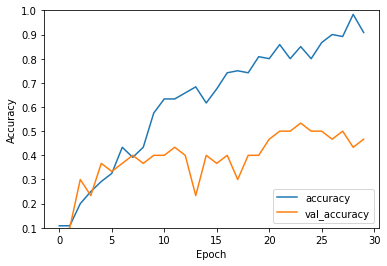

In [29]:
plt.plot(model_20f.history['accuracy'], label='accuracy')
plt.plot(model_20f.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [ ]:
# model_20f.save_weights('./checkpoints/model_20f')

In [30]:

filters={'fil1': 32,'fil2':64}

kernels={'ker1':3,'ker2':5}

learn={"norm": 0.001,'high':0.002}

In [31]:
def Twlv_grid(fltr,k,lr):   
    model = models.Sequential()    
    model.add(layers.Conv2D(32*1, (k,k), activation='relu', input_shape=(224,224,3)))    
    model.add(layers.Conv2D(32*1, (k,k), activation='relu'))   
    model.add(layers.Conv2D(32*1, (k,k), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32*2, (k,k), activation='relu'))
    model.add(layers.Conv2D(32*2, (k,k), activation='relu'))
    model.add(layers.Conv2D(32*2, (k,k), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32*4, (k,k), activation='relu'))
    model.add(layers.Conv2D(32*4, (k,k), activation='relu'))
    model.add(layers.Conv2D(32*4, (k,k), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32*8, (k,k), activation='relu'))
    model.add(layers.Conv2D(32*8, (k,k), activation='relu'))
    model.add(layers.Conv2D(32*8, (k,k), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))       
    model.add(layers.Flatten())
    model.add(layers.Dense(fltr*2,activation='relu'))  
    model.add(layers.Dense(len(train_generator[0])+1,activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(epsilon=1e-4, learning_rate=lr),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [32]:
val_accs_params={}
callback=callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
for fil, fil_v in filters.items():      
    for k, k_v in kernels.items():
        for lr, lr_v in learn.items(): 
            twlv=Twlv_grid(fil_v,k_v,lr_v)            
            model_f=twlv.fit(train_generator,epochs=15,validation_data=val_generator,callbacks=[callback])
            val_lss,val_acc = twlv.evaluate(val_generator)
            val_accs_params[fil+k+lr]=val_lss,val_acc

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 1.2131 - accuracy: 0.3333 - val_loss: 21.7007 - val_accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 6s 6s/step - loss: 23.2348 - accuracy: 0.3333 - val_loss: 1.3231 - val_accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 6s 6s/step - loss: 1.2673 - accuracy: 0.3333 - val_loss: 1.1204 - val_accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 6s 6s/step - loss: 1.1070 - accuracy: 0.3333 - val_loss: 1.0876 - val_accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 6s 6s/step - loss: 1.0887 - accuracy: 0.4000 - val_loss: 1.0704 - val_accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 6s 6s/step - loss: 1.0781 - accuracy: 0.3333 - val_loss: 1.0599 - val_accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 6s 6s/step - loss: 1.0730 - accuracy: 0.3333 - val_loss: 1.0352 - val_accuracy: 0.6667
Epoch 8/15
1/1 [=======================

Epoch 9/15
1/1 [==============================] - 12s 12s/step - loss: 1.0998 - accuracy: 0.3333 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 2s 2s/step
Epoch 1/15
1/1 [==============================] - 13s 13s/step - loss: 1.8647 - accuracy: 0.3333 - val_loss: 184.0887 - val_accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 11s 11s/step - loss: 168.4929 - accuracy: 0.3333 - val_loss: 2.8424 - val_accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 12s 12s/step - loss: 2.8868 - accuracy: 0.3333 - val_loss: 2.6992 - val_accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 2s 2s/step


In [33]:
val_accs_params

{'fil1ker1norm': (1.0979870557785034, 0.3333333432674408),
 'fil1ker1high': (1.0871189832687378, 0.3333333432674408),
 'fil1ker2norm': (1.0469813346862793, 0.5),
 'fil1ker2high': (1.0977977514266968, 0.3333333432674408),
 'fil2ker1norm': (1.0773807764053345, 0.3333333432674408),
 'fil2ker1high': (1.1242519617080688, 0.3333333432674408),
 'fil2ker2norm': (1.0946060419082642, 0.3333333432674408),
 'fil2ker2high': (1.2199323177337646, 0.3333333432674408)}

In [52]:
filters={'fil1': 3}#2,'fil2':64}

kernels={'ker1':3,'ker2':5}

learn={"norm": 0.001,'low':0.005}

In [54]:
val_accs_params={}

for fil, fil_v in filters.items():      
    for k, k_v in kernels.items():
        for lr, lr_v in learn.items(): 
            print(fil+k+lr)
            twlv=Twlv_grid(fil_v,k_v,lr_v)
            model_f=twlv.fit(train_generator,epochs=3,validation_data=val_generator)
            val_accs=model_f.history['val_accuracy']
            val_lsss=model_f.history['val_loss']
            val_accs_params[fil+k+lr]=val_lsss,val_accs

fil1ker1norm
Epoch 1/3
1/1 [==============================] - 1s 1s/step - loss: 1.1046 - accuracy: 0.2000 - val_loss: 1.1041 - val_accuracy: 0.3333
Epoch 2/3
1/1 [==============================] - 0s 480ms/step - loss: 1.0950 - accuracy: 0.3333 - val_loss: 1.0915 - val_accuracy: 0.3333
Epoch 3/3
1/1 [==============================] - 0s 474ms/step - loss: 1.0980 - accuracy: 0.3333 - val_loss: 1.0720 - val_accuracy: 0.3333
fil1ker1low
Epoch 1/3
1/1 [==============================] - 1s 1s/step - loss: 1.2461 - accuracy: 0.3333 - val_loss: 1.0753 - val_accuracy: 0.3333
Epoch 2/3
1/1 [==============================] - 0s 486ms/step - loss: 1.0972 - accuracy: 0.3333 - val_loss: 1.0692 - val_accuracy: 0.3333
Epoch 3/3
1/1 [==============================] - 0s 459ms/step - loss: 1.0897 - accuracy: 0.3333 - val_loss: 1.0618 - val_accuracy: 0.3333
fil1ker2norm
Epoch 1/3
1/1 [==============================] - 1s 1s/step - loss: 1.1168 - accuracy: 0.4667 - val_loss: 1.3750 - val_accuracy: 0.333

In [55]:
val_accs_params

{'fil1ker1norm': ([1.1040838956832886, 1.091464877128601, 1.0720248222351074],
  [0.3333333432674408, 0.3333333432674408, 0.3333333432674408]),
 'fil1ker1low': ([1.075334906578064, 1.0692082643508911, 1.0618118047714233],
  [0.3333333432674408, 0.3333333432674408, 0.3333333432674408]),
 'fil1ker2norm': ([1.3749905824661255, 1.1602091789245605, 1.0769305229187012],
  [0.3333333432674408, 0.3333333432674408, 0.5]),
 'fil1ker2low': ([1.042349100112915, 1.0719786882400513, 1.0616697072982788],
  [0.3333333432674408, 0.3333333432674408, 0.3333333432674408])}